In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

## Putting It All Together

In [3]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [4]:
weights = init_params((28*28,1))
bias = init_params(1)

In [41]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path
path.ls()
(path/'training').ls()

zeroes = (path/'training'/'0').ls().sorted()
ones = (path/'training'/'1').ls().sorted()
twos = (path/'training'/'2').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
fours = (path/'training'/'4').ls().sorted()
fives = (path/'training'/'5').ls().sorted()
sixes = (path/'training'/'6').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()
nines = (path/'training'/'9').ls().sorted()

zeroes_tensors = [tensor(Image.open(o)) for o in zeroes]
ones_tensors = [tensor(Image.open(o)) for o in ones]
twoes_tensors = [tensor(Image.open(o)) for o in twos]
threes_tensors = [tensor(Image.open(o)) for o in threes]
fours_tensors = [tensor(Image.open(o)) for o in fours]
fives_tensors = [tensor(Image.open(o)) for o in fives]
sixes_tensors = [tensor(Image.open(o)) for o in sixes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
eights_tensors = [tensor(Image.open(o)) for o in eights]
nines_tensors = [tensor(Image.open(o)) for o in nines]

stacked_zeroes = torch.stack(zeroes_tensors).float()/255
stacked_ones = torch.stack(ones_tensors).float()/255
stacked_twos = torch.stack(twoes_tensors).float()/255
stacked_threes = torch.stack(threes_tensors).float()/255
stacked_fours = torch.stack(fours_tensors).float()/255
stacked_fives = torch.stack(fives_tensors).float()/255
stacked_sixes = torch.stack(sixes_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_eights = torch.stack(eights_tensors).float()/255
stacked_nines = torch.stack(nines_tensors).float()/255

train_x = torch.cat([stacked_zeroes,stacked_ones,stacked_twos,stacked_threes,stacked_fours,stacked_fives,stacked_sixes,stacked_sevens,stacked_eights,stacked_nines]).view(-1, 28*28)
train_y = tensor([0]*len(zeroes) + [1]*len(ones) + [2]*len(twos) + [3]*len(threes) + [4]*len(fours) + [5]*len(fives) + [6]*len(sixes) + [7]*len(sevens) + [8]*len(eights) + [9]*len(nines)).unsqueeze(1)

dset = list(zip(train_x,train_y))

dl = DataLoader(dset, batch_size=256)

valid_0_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'0').ls()])
valid_0_tens = valid_0_tens.float()/255
valid_1_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'1').ls()])
valid_1_tens = valid_1_tens.float()/255
valid_2_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'2').ls()])
valid_2_tens = valid_2_tens.float()/255
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_4_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'4').ls()])
valid_4_tens = valid_4_tens.float()/255
valid_5_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'5').ls()])
valid_5_tens = valid_5_tens.float()/255
valid_6_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'6').ls()])
valid_6_tens = valid_6_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_8_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'8').ls()])
valid_8_tens = valid_8_tens.float()/255
valid_9_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'9').ls()])
valid_9_tens = valid_9_tens.float()/255

valid_x = torch.cat([valid_0_tens, valid_1_tens, valid_2_tens, valid_3_tens, valid_4_tens, valid_5_tens, valid_6_tens, valid_7_tens, valid_8_tens, valid_9_tens]).view(-1, 28*28)
valid_y = tensor([0]*len(valid_0_tens) + [1]*len(valid_1_tens) + [2]*len(valid_2_tens) + [3]*len(valid_3_tens) + [4]*len(valid_4_tens) + [5]*len(valid_5_tens) + [6]*len(valid_6_tens) + [7]*len(valid_7_tens) + [8]*len(valid_8_tens) + [9]*len(valid_9_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

valid_dl = DataLoader(valid_dset, batch_size=256)

In [43]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
path.ls()
(path/'train').ls()

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

dset = list(zip(train_x,train_y))

dl = DataLoader(dset, batch_size=256)

valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

valid_dl = DataLoader(valid_dset, batch_size=256)

In [6]:
batch = train_x[:4]

In [7]:
def linear1(xb): return xb@weights + bias

In [8]:
preds = linear1(batch)

In [9]:
def sigmoid(x): return 1/(1+torch.exp(-x))

In [10]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [11]:
loss = mnist_loss(preds, train_y[:4])

In [12]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(4.4802e-05), tensor([0.0003]))

In [13]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [14]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(8.9603e-05), tensor([0.0005]))

In [15]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(0.0001), tensor([0.0008]))

In [16]:
weights.grad.zero_()
bias.grad.zero_();

In [17]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [18]:
(preds>0.0).float() == train_y[:4]

tensor([[True],
        [True],
        [True],
        [True]])

In [19]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [20]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(1.)

In [21]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [22]:
validate_epoch(linear1)

0.0942

In [23]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.098

In [24]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.098 0.098 0.0991 0.1001 0.102 0.1033 0.1048 0.1057 0.1066 0.1074 0.1086 0.1095 0.1099 0.1106 0.1119 0.1124 0.1133 0.1134 0.114 0.1147 

In [42]:
dls = DataLoaders(dl, valid_dl)

### Creating an Optimizer

In [25]:
linear_model = nn.Linear(28*28,1)

In [26]:
w,b = linear_model.parameters()

In [27]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [28]:
opt = BasicOptim(linear_model.parameters(), lr)

In [29]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [30]:
validate_epoch(linear_model)

0.0769

In [31]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [32]:
train_model(linear_model, 20)

0.098 0.098 0.098 0.098 0.0982 0.0984 0.0988 0.0998 0.1006 0.1021 0.1038 0.1052 0.1063 0.1067 0.107 0.1072 0.1082 0.1088 0.1089 0.1087 

In [33]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.098 0.098 0.098 0.098 0.0982 0.0984 0.0987 0.0994 0.0998 0.101 0.1025 0.1041 0.1056 0.1063 0.1064 0.1066 0.1075 0.108 0.1079 0.1085 

In [35]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
loss_func=mnist_loss, metrics=batch_accuracy)

In [74]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.000645,0.104988,0.104700,00:01
1,0.000482,0.086720,0.124500,00:01
2,0.000608,0.078033,0.133400,00:01
3,0.000694,0.074158,0.136800,00:01
4,0.000642,0.073499,0.138000,00:01
5,0.000617,0.051463,0.160400,00:01
6,0.000546,0.070548,0.141000,00:01


KeyboardInterrupt: ignored

## Adding a Nonlinearity

In [93]:
features = 90
nrOfLayers = 0

layers = []
layers.append(nn.Linear(28*28,features))

for i in range(nrOfLayers):
  layers.append(nn.ReLU())
  layers.append(nn.Linear(features,features))

layers.append(nn.ReLU())
layers.append(nn.Linear(features,1))

print('Nr of layers', len(layers)) 
layers

Nr of layers 3


[Linear(in_features=784, out_features=90, bias=True),
 ReLU(),
 Linear(in_features=90, out_features=1, bias=True)]

In [96]:
simple_net = nn.Sequential(*layers)

In [97]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [98]:
learn.fit(50, 1.0)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.002604,0.111212,0.098000,00:01
1,0.001329,0.097870,0.107700,00:01
2,0.000930,0.092041,0.117100,00:01
3,0.000873,0.087795,0.121700,00:01
4,0.000879,0.083624,0.127600,00:01
5,0.000905,0.079636,0.132200,00:01
6,0.000929,0.076391,0.135000,00:01
7,0.000950,0.073506,0.138300,00:01
8,0.000969,0.070597,0.142000,00:01
9,0.000986,0.068260,0.143900,00:01


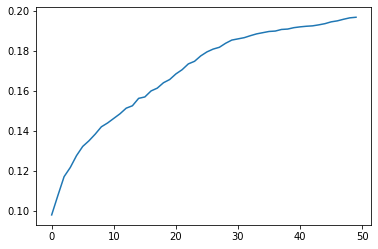

In [99]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [100]:
learn.recorder.values[-1][2]

0.19670000672340393